# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [21]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from pprint import pprint

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [22]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(cities)

['bathsheba', 'hermanus', 'brae', 'new norfolk', 'olafsvik', 'bluff', 'east london', 'ponta do sol', 'adrar', 'mys shmidta', 'bredasdorp', 'yellowknife', 'punta arenas', 'pimentel', 'hithadhoo', 'marcona', 'port alfred', 'samusu', 'koungou', 'hobart', 'ushuaia', 'jamestown', 'ayan', 'sivas', 'lata', 'smithers', 'mahebourg', 'arraial do cabo', 'challans', 'rikitea', 'hilo', 'busselton', 'tasiilaq', 'yumen', 'ilulissat', 'saint-philippe', 'tuktoyaktuk', 'kaitangata', 'maceio', 'kapaa', 'meulaboh', 'biskupiec', 'saint-augustin', 'pevek', 'vaini', 'leningradskiy', 'hualmay', 'faanui', 'barentsburg', 'tumannyy', 'ferkessedougou', 'butaritari', 'cao bang', 'barrow', 'dunedin', 'beringovskiy', 'saskylakh', 'lofthus', 'ribeira grande', 'taltal', 'nikolskoye', 'puerto ayora', 'rocha', 'attawapiskat', 'clarence town', 'praya', 'methoni', 'ahipara', 'carauari', 'tvardica', 'kalmunai', 'lebu', 'nuevo progreso', 'filadelfia', 'belushya guba', 'katobu', 'tecoanapa', 'satitoa', 'wairoa', 'esperance',

In [23]:
print(len(cities))

598


In [24]:
cities_df = pd.DataFrame({"City": cities,})
cities_df.to_csv("citylog.csv", header = True)
print(cities_df)

                      City
0                bathsheba
1                 hermanus
2                     brae
3              new norfolk
4                 olafsvik
5                    bluff
6              east london
7             ponta do sol
8                    adrar
9              mys shmidta
10              bredasdorp
11             yellowknife
12            punta arenas
13                pimentel
14               hithadhoo
15                 marcona
16             port alfred
17                  samusu
18                 koungou
19                  hobart
20                 ushuaia
21               jamestown
22                    ayan
23                   sivas
24                    lata
25                smithers
26               mahebourg
27         arraial do cabo
28                challans
29                 rikitea
..                     ...
568                  kieta
569               kizhinga
570               camacupa
571                 dwarka
572          glyadyanskoye
5

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [25]:
city_list = []
temp_list = []
lat_list = []
lng_list = []
humidity_list = []
cloud_list = []
wind_list = []

j = 0
i = 1

while j < 600:
    city_value = cities_df.loc[j, 'City']
    url = "http://api.openweathermap.org/data/2.5/weather?"
    query_url = f"{url}appid={api_key}&units=imperial&q={city_value}"
    response = requests.get(query_url).json()
    r = requests.head(query_url)
    if response != [] and r.status_code == 200:
        try:
            print(f"{i}. Getting information for {city_value}.")
            city_list.append(response['name'])
            temp_list.append(response['main']['temp'])
            lat_list.append(response['coord']['lat'])
            lng_list.append(response['coord']['lon'])
            humidity_list.append(response['main']['humidity'])
            cloud_list.append(response['clouds']['all'])
            wind_list.append(response['wind']['speed'])            
            print(f'Sleeping for 1 second to avoid disconnection.')
            time.sleep(1.0)
            print(f'------------------------------------------')
        except (KeyError, IndexError):
            print("Missing field/result... skipping.")
                
    j += 1
    i += 1
    print(f'Moving on to the next city in the list...')
    print(f'------------------------------------------')

1. Getting information for bathsheba.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
2. Getting information for hermanus.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
3. Getting information for brae.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
4. Getting information for new norfolk.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
6. Getting information for bluff.
Sleeping for 1 second to avoid discon

43. Getting information for saint-augustin.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
44. Getting information for pevek.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
45. Getting information for vaini.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
46. Getting information for leningradskiy.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
47. Getting information for hualmay.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next

86. Getting information for pisco.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
87. Getting information for chuy.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
88. Getting information for susangerd.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
89. Getting information for jalu.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
90. Getting information for port elizabeth.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in

127. Getting information for lompoc.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
128. Getting information for gobabis.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
129. Getting information for bilma.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
131. Getting information for severo-kurilsk.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
132. Getting information for cherskiy.
Sleeping for 1 second to

168. Getting information for saint george.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
169. Getting information for xingtai.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
170. Getting information for shubarkuduk.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
171. Getting information for souillac.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
173. Getting information for ancud.
Sleeping for 1 second

210. Getting information for salalah.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
211. Getting information for biak.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
212. Getting information for dzhankoy.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
213. Getting information for gorontalo.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
214. Getting information for zhezkazgan.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next 

Moving on to the next city in the list...
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
253. Getting information for champerico.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
254. Getting information for la asuncion.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
255. Getting information for itamaraca.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
257. Getting information for oytal.
Sleeping for 1 second to avoid disconnection.
------------------

------------------------------------------
Moving on to the next city in the list...
------------------------------------------
293. Getting information for nizwa.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
294. Getting information for almaznyy.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
295. Getting information for koslan.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
296. Getting information for sao felix do xingu.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
297. Getting in

------------------------------------------
Moving on to the next city in the list...
------------------------------------------
335. Getting information for akdepe.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
336. Getting information for vila velha.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
337. Getting information for birjand.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
338. Getting information for airai.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
339. Getting information

374. Getting information for myre.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
375. Getting information for abu samrah.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
377. Getting information for saint-gabriel.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
378. Getting information for hami.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
379. Getting information for richards bay.
Sleeping for 1 second

419. Getting information for hojslev.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
420. Getting information for kimbe.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
421. Getting information for senno.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
422. Getting information for yar-sale.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
423. Getting information for clarksburg.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next cit

------------------------------------------
Moving on to the next city in the list...
------------------------------------------
460. Getting information for mamallapuram.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
461. Getting information for tomatlan.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
462. Getting information for teguldet.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
463. Getting information for piacabucu.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
464. Getting in

------------------------------------------
Moving on to the next city in the list...
------------------------------------------
501. Getting information for mattru.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
502. Getting information for longuenesse.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
503. Getting information for ostrovnoy.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
504. Getting information for inhambane.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
505. Getting info

542. Getting information for zykovo.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
543. Getting information for porto torres.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
544. Getting information for masterton.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
546. Getting information for aksay.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
547. Getting information for puri.
Sleeping for 1 second to avo

584. Getting information for saint anthony.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
585. Getting information for varkaus.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
586. Getting information for kirakira.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
588. Getting information for sterling.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
Moving on to the next city in the list...
-----------------

KeyError: 'the label [598] is not in the [index]'

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [26]:
#insert all information contained in lists into weather dataframe
weather_df = pd.DataFrame({"City":city_list, "Cloudiness":cloud_list,"Humidity":humidity_list,
                           "Latitude":lat_list,"Longitude":lng_list, "Temperature":temp_list, "Wind Speed": wind_list})
#output a excel file
weather_df.to_csv("random_city.csv")
weather_df

,City,Cloudiness,Humidity,Latitude,Longitude,Temperature,Wind Speed
0,Bathsheba,20,73,13.22,-59.52,77.00,11.41
1,Hermanus,44,46,-34.42,19.24,71.29,3.27
2,Brae,44,93,60.40,-1.35,41.25,10.29
3,New Norfolk,0,41,-42.78,147.06,77.00,11.41
4,Bluff,0,28,-23.58,149.07,88.20,13.89
5,East London,20,56,-33.02,27.91,69.80,3.36
6,Ponta do Sol,48,96,-20.63,-46.00,64.35,3.38
7,Adrar,0,38,27.87,-0.29,39.20,9.17
8,Bredasdorp,44,46,-34.53,20.04,71.60,14.99
9,Yellowknife,90,76,62.45,-114.38,-5.81,14.99


In [27]:
weather_df.count()

City           523
Cloudiness     523
Humidity       523
Latitude       523
Longitude      523
Temperature    523
Wind Speed     523
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

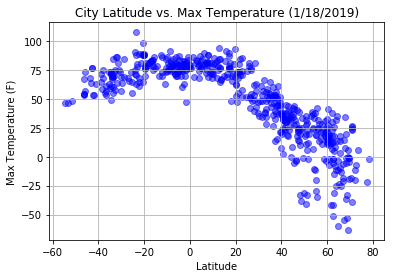

In [29]:
#plotting City Latitude vs. Max Temperature
plt.scatter(weather_df["Latitude"], weather_df["Temperature"],marker="o", color="b", alpha = 0.5)
plt.title("City Latitude vs. Max Temperature (1/18/2019)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid()
plt.savefig("max_temperature.png")

#Based on the observation, temperatures of the observed cities that are located
#in the northern hemisphere are relatively colder comparing to cities that are located
#in southern hemisphere in Jan. of 2019.

#### Latitude vs. Humidity Plot

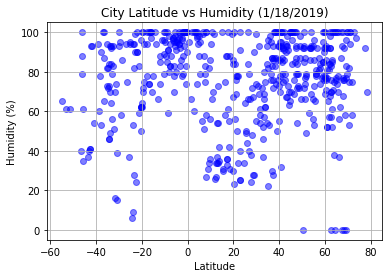

In [30]:
#plotting City Latitude vs Humidity
plt.scatter(weather_df["Latitude"], weather_df["Humidity"], marker="o", color="b", alpha = 0.5)
plt.title("City Latitude vs Humidity (1/18/2019)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid()
plt.savefig("humidity.png")

#Based on the observation from below plotting, there is no significant difference can be
#observed and proved there is a significant difference in humidity between northern and
#southern hemisphere. The differences of humidity of each observed data appears to be determined
#by longitude of the observed data.

#### Latitude vs. Cloudiness Plot

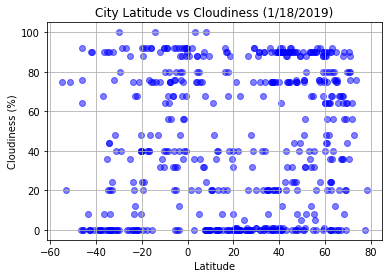

In [31]:
#plotting City Latitude vs Cloudiness
plt.scatter(weather_df["Latitude"], weather_df["Cloudiness"], marker="o", color="b", alpha = 0.5)
plt.title("City Latitude vs Cloudiness (1/18/2019)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid()
plt.savefig("cloudiness.png")

#Based on the plotting from below, cloudiness of each city does
#appear to be affected by latitude of the observed city, possibly affect by the longitude of the observed data.

#### Latitude vs. Wind Speed Plot

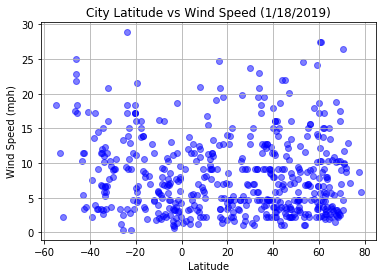

In [32]:
#plotting City Latitude vs Wind Speed
plt.scatter(weather_df["Latitude"], weather_df["Wind Speed"], marker="o", color="b", alpha = 0.5)
plt.title("City Latitude vs Wind Speed (1/18/2019)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid()
plt.savefig("wind_speed.png")

#This time of year, wind speed does not appear to have a significant
#correlation with latitude with majority of observed cities are located around 0-10 mph zone.  